# Hello 'classifier'

The question we want to ask of this cuisine dataset is actually a multiclass question, as we have several potential national cuisines to work with. Given a batch of ingredients, which of these many classes will the data fit?

Scikit-learn offers several different algorithms to use to classify data, depending on the kind of problem you want to solve. In the next two lessons, you'll learn about several of these algorithms.

## Exercise - clean and balance your data

The first task at hand, before starting this project, is to clean and balance your data to get better results. Start with the blank notebook.ipynb file in the root of this folder.

The first thing to install is imblearn. This is a Scikit-learn package that will allow you to better balance the data (you will learn more about this task in a minute).

1. To install imblearn, run pip install in your environment's terminal, like so:

> > pip install imblearn

2. Import the packages you need to import your data and visualize it, also import SMOTE from imblearn.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

3. The next task will be to import the data:

The cuisines.csv file will be provided by your professor.

In [19]:
df  = pd.read_csv('cuisines.csv')

4. Check the data's shape:

In [20]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


5. Get info about this data by calling info():

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


## Exercise - learning about cuisines
1. Plot the data as bars by calling barh():

<Axes: ylabel='cuisine'>

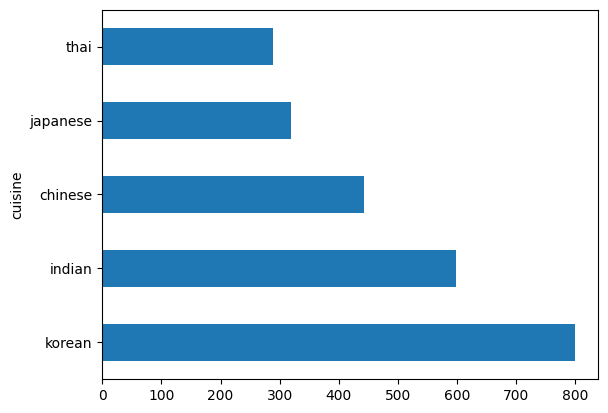

In [22]:
df.cuisine.value_counts().plot.barh()

There are a finite number of cuisines, but the distribution of data is uneven. You can fix that! Before doing so, explore a little more.

2. Find out how much data is available per cuisine and print it out:

In [23]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


## Discovering ingredients

Now you can dig deeper into the data and learn what are the typical ingredients per cuisine. You should clean out recurrent data that creates confusion between cuisines, so let's learn about this problem.

1. Create a function create_ingredient() in Python to create an ingredient dataframe. This function will start by dropping an unhelpful column and sort through ingredients by their count:

In [24]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

Now you can use that function to get an idea of top ten most popular ingredients by cuisine.

2. Call create_ingredient() and plot it calling barh():

<Axes: >

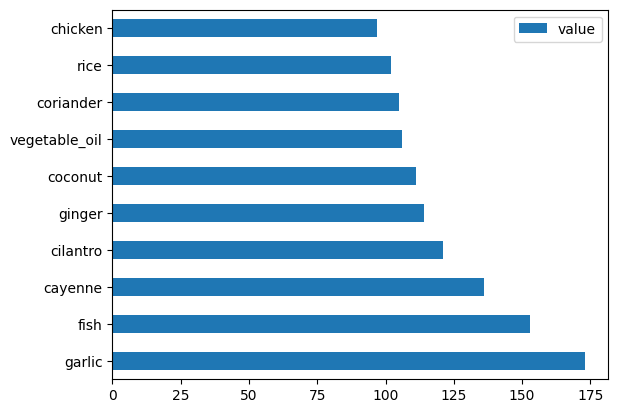

In [25]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

3. Do the same for the japanese data:

<Axes: >

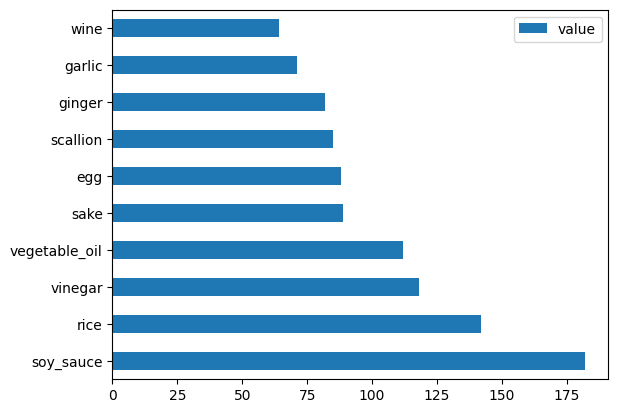

In [26]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

4. Now for the chinese ingredients:

<Axes: >

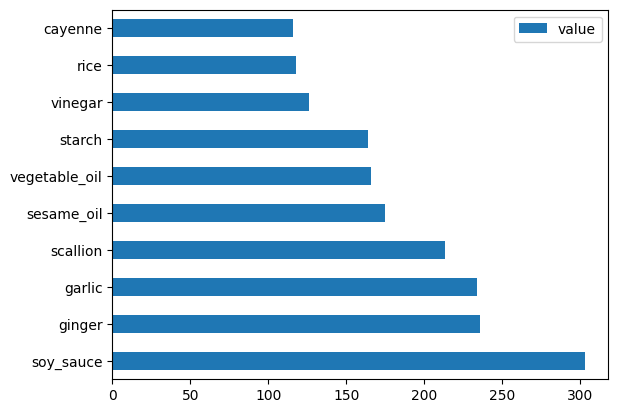

In [27]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

5. Plot the indian ingredients:

<Axes: >

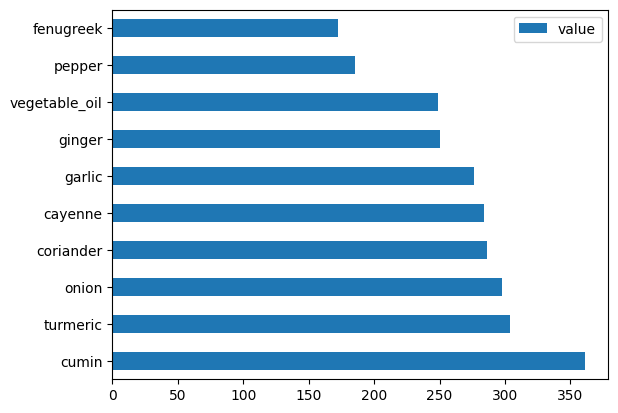

In [28]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

6. Finally, plot the korean ingredients:

<Axes: >

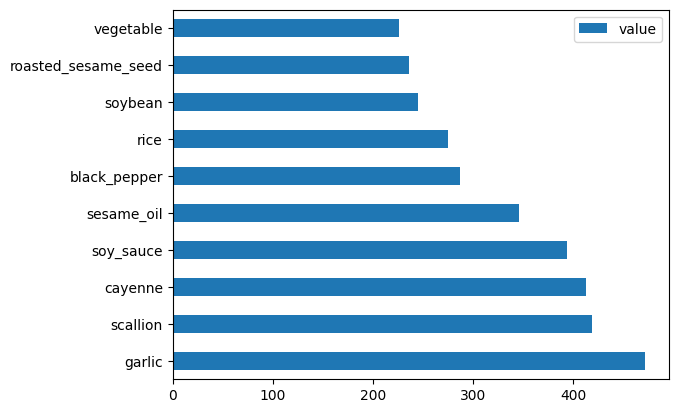

In [29]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

7. Now, drop the most common ingredients that create confusion between distinct cuisines, by calling drop():

Everyone loves rice, garlic and ginger!

In [30]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Balance the dataset
Now that you have cleaned the data, use SMOTE - "Synthetic Minority Over-sampling Technique" - to balance it.

1. Call fit_resample(), this strategy generates new samples by interpolation.

In [31]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

By balancing your data, you'll have better results when classifying it. Think about a binary classification. If most of your data is one class, a ML model is going to predict that class more frequently, just because there is more data for it. Balancing the data takes any skewed data and helps remove this imbalance.

2. Now you can check the numbers of labels per ingredient:

In [32]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


The data is nice and clean, balanced, and very delicious!

3. The last step is to save your balanced data, including labels and features, into a new dataframe that can be exported into a file:

In [33]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

4. You can take one more look at the data using transformed_df.head() and transformed_df.info(). Save a copy of this data for use in future lessons:

In [34]:
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("cleaned_cuisines.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


This fresh CSV (cleaned_cuisines.csv) can now be found in the root data folder.
Note: You may need to adjust your folder output to ensure the transformed file properly.